# Central Limit Theorem

The central limit theorem is a valuable discovery in statistics that opens up a world of hypothesis testing for us.  It states that a distribution made of sample means approximates a normal distribution, even if the underlying distribution of the original population is NOT normally distributed. Due to the central limit theorem, as long as our population is large enough (greater than 30), we can take advantage of tests that assume a normal distribution.

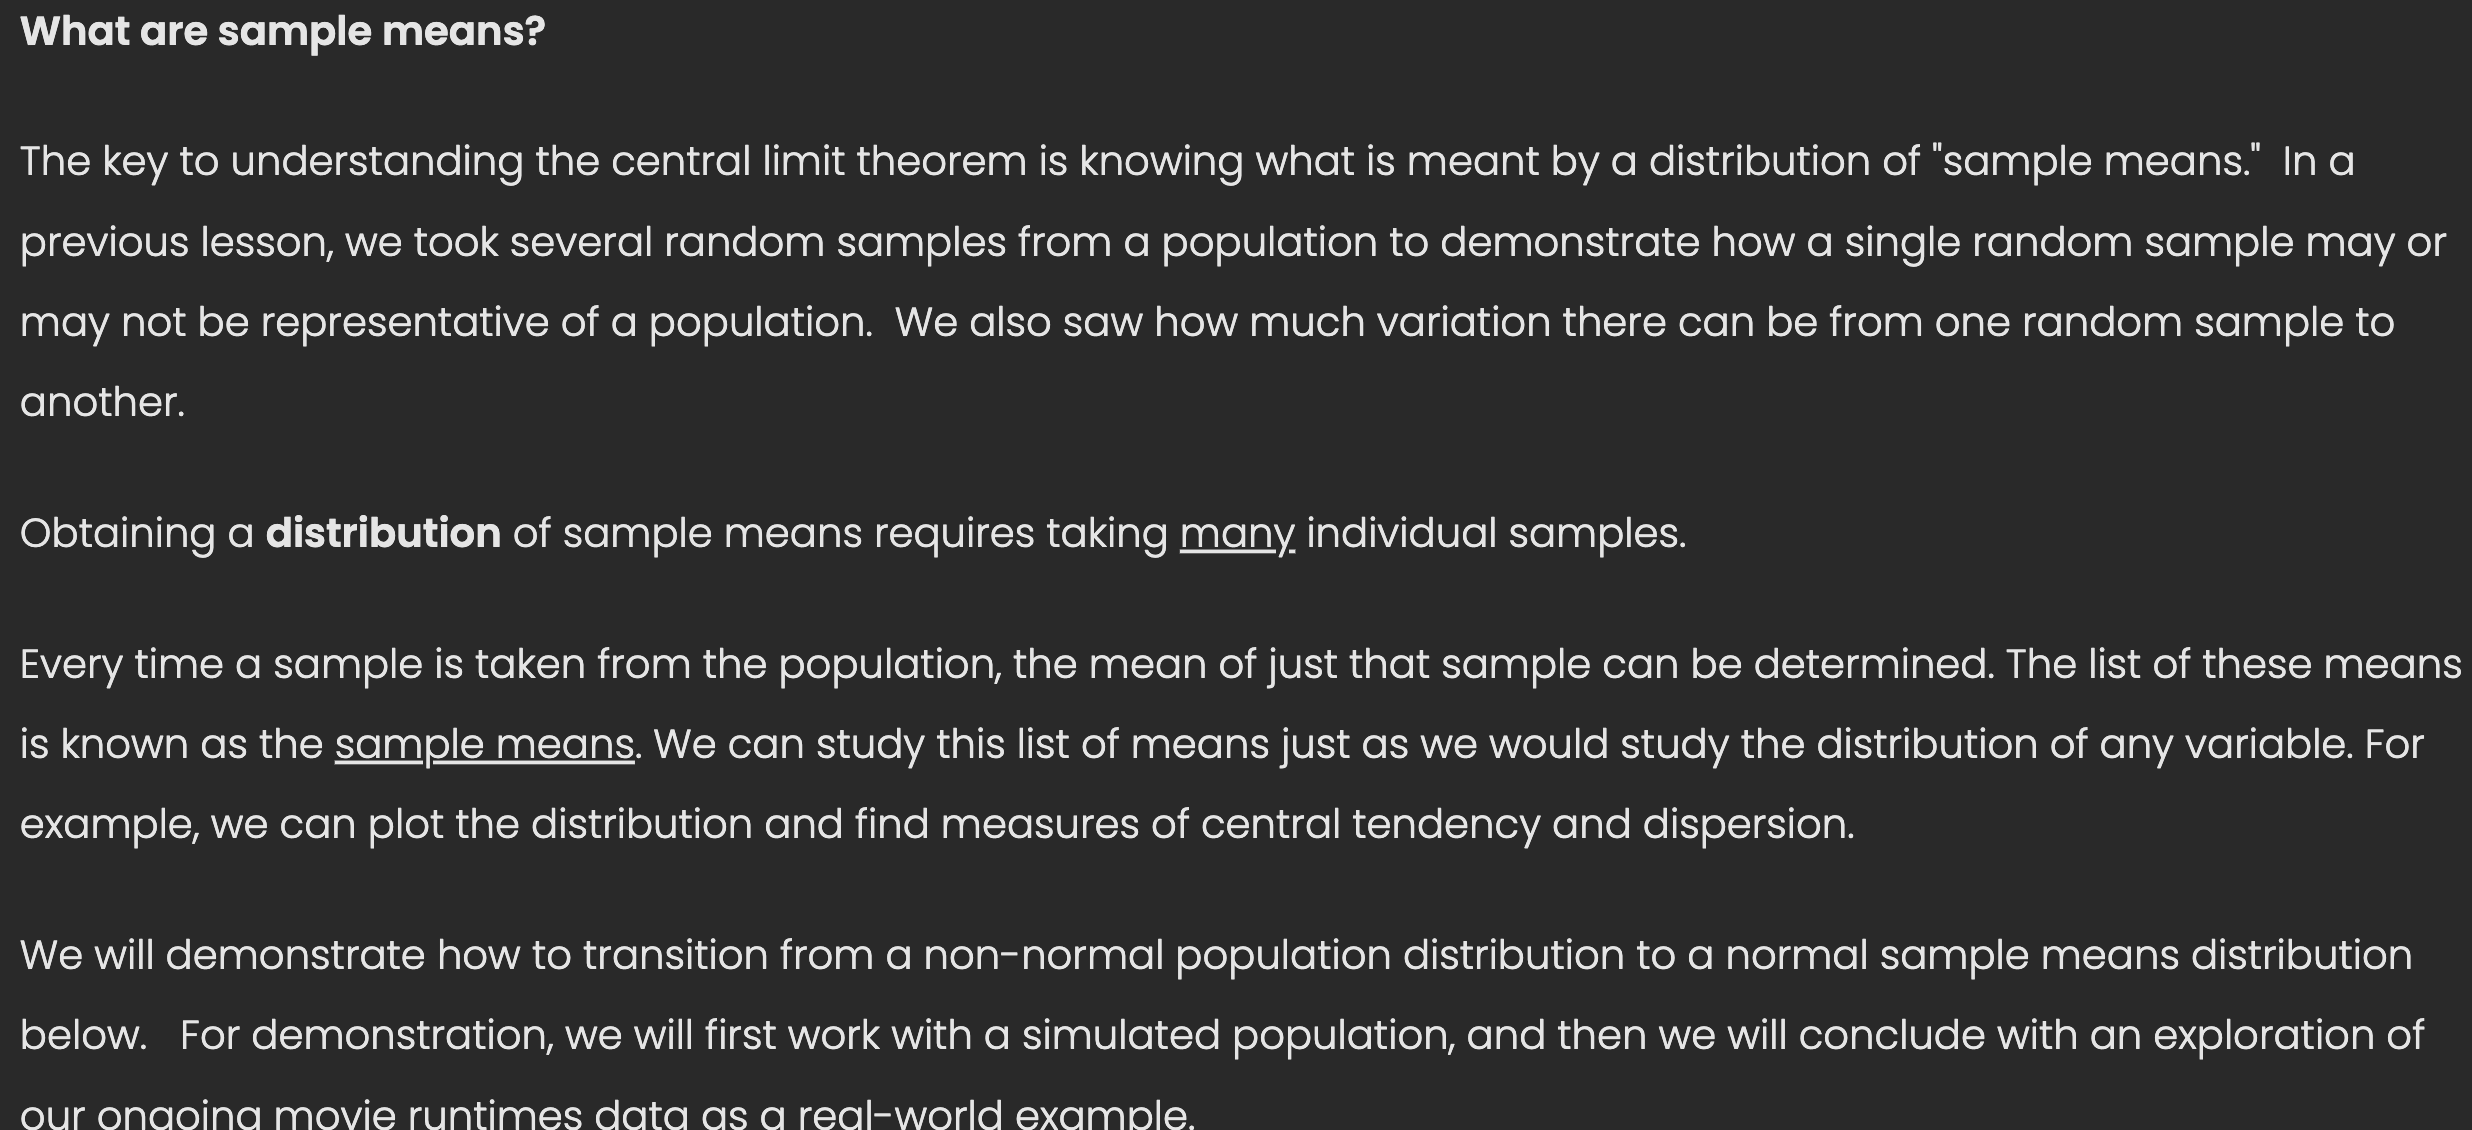


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


## Example Simulated Population: A Uniform Distribution
To help you understand sample means and the central limit theorem, we will first walk through an example where we have purposefully created a non-normal distribution.  In this case, the distribution has a "uniform" distribution.

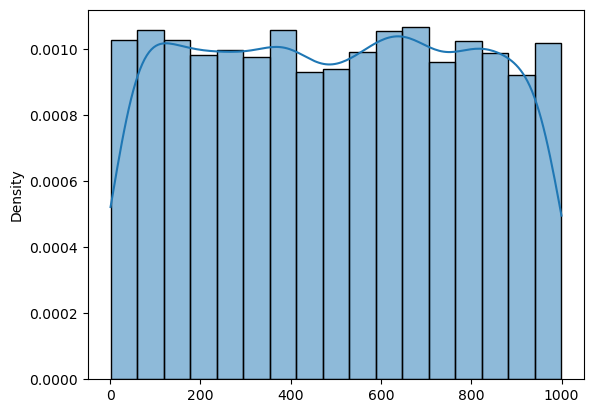

In [3]:
#Create the simulated population
##Numpy will create this simulated distribution for you by using np.random.uniform(). 
##Set the seed to get reproducible results.

#choose values between 1-1000, choose 5000 values
np.random.seed(42)
uniform = np.random.uniform(1, 1000, 5000)

#Visualize the population
## Let's graph the density plot
sns.histplot(x=uniform,stat='density', kde=True);

## Create the list of sample means

The following code takes 1000 different samples from our original population, finds the mean of each sample, and creates a list of these "sample means."

In [4]:
## loop to take 1000 samples of 30 and calculate the means of each sample
np.random.seed(42)
sample_means = []
for i in range(1000):    
  sample = np.random.choice(uniform,size=30,replace=False)    
  sample_means.append( np.mean(sample))
# Print the first 5 sample means
sample_means[0:5]

[369.4808932208104,
 555.6072958462468,
 507.2136853427085,
 449.9927701766231,
 530.2748285204503]

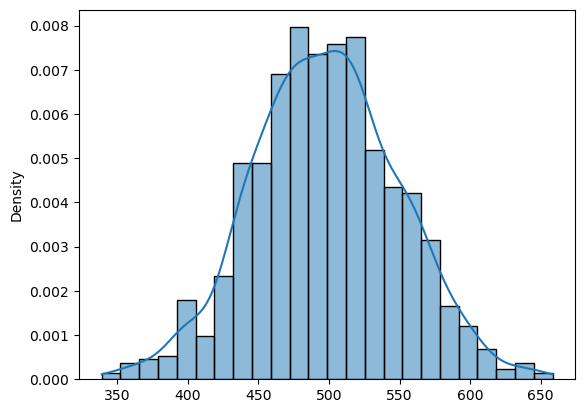

In [5]:
# visualize the sample means
sns.histplot(sample_means,kde=True,stat='density');

In [6]:
#Test for Normality

stats.normaltest(sample_means)

#Our p-value is greater than 0.05, so we accept the null hypothesis that, 
#our distribution of sample means is normal! 

NormaltestResult(statistic=0.14786790715227197, pvalue=0.9287330313111472)

## Example Real Data: Movie Runtimes


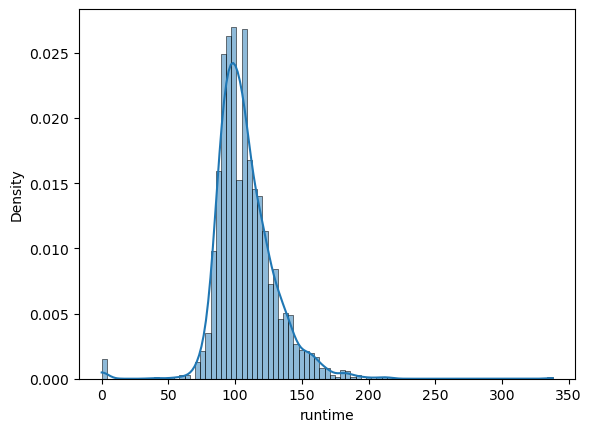

In [7]:
#define population
## Load the data
movie_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRzwOVZswzLMacwVwQJLB4WnDZIy46gxMxZzGtJs0FKCLhwXDb8kUI1wmo9-Nll0oo1EpgjFbBoUEV/pub?output=csv"
df = pd.read_csv(movie_url,index_col=0,parse_dates=['release_date'])
## Filter out movie population of interest and remove nulls
## keeping only movies released after 2000 and before 2020
df = df[(df['release_date'] > "2000") & (df['release_date'] <"2020")]
df = df.dropna(subset=['runtime'])

#Visualize the population
#Let's visualize the distribution of movie runtimes. 
#For our purposes, this is considered the distribution of the entire population.
sns.histplot(x=df['runtime'], kde=True, stat='density');

In [8]:
# test for normality

stats.normaltest(df['runtime'])

#p value is much less than .05 so not normal distribution

NormaltestResult(statistic=498.6206359702571, pvalue=5.319914071356255e-109)

## create sample collection

In [9]:
## loop to take 1000 samples of 30 and calculate the mean of each sample
np.random.seed(42)
sample_means = []
for i in range(1000):   
  sample = np.random.choice(df['runtime'], size=30, replace=False)    
  sample_means.append(np.mean(sample))
sample_means[0:5]

[109.33333333333333, 107.8, 109.43333333333334, 106.46666666666667, 110.9]

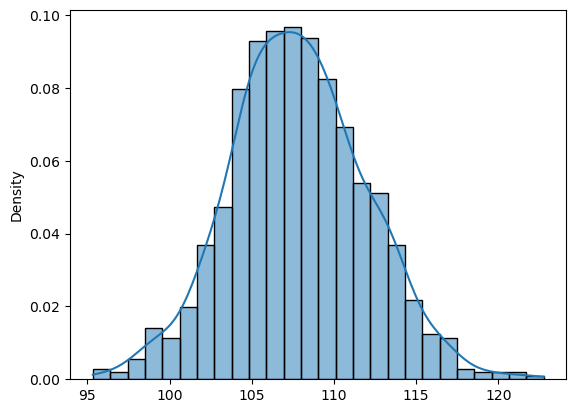

In [10]:
#plot sample
sns.histplot(sample_means,kde=True,stat='density');

In [11]:
#test for normality
stats.normaltest(sample_means)
# The p-value is greater than 0.5, which means that we accept the null hypothesis and 
#conclude that our sample means distribution is normally distributed!

NormaltestResult(statistic=4.216509433391504, pvalue=0.12144974578576584)

# Why this matters for Data Science
The fact that as long as the population is greater than **30**, ANY distribution's sample means will form a normal distribution shows that REGARDLESS of what the original data LOOKS like, we can use the PDF of a normal distribution to get p-values comparing sample means!
This is a liberating realization that allows us to push onward in our hypothesis-testing journey!